In [24]:
import numpy as np
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import EfficientSU2
from qiskit_algorithms.time_evolvers.variational import ImaginaryMcLachlanPrinciple
from qiskit_algorithms import TimeEvolutionProblem

from qiskit_algorithms import VarQITE
from qiskit.primitives import Estimator

hamiltonian = SparsePauliOp(["ZZ", "IX", "XI"], coeffs=[-0.2, -1, -1])
magnetization = SparsePauliOp(["IZ", "ZI"], coeffs=[1, 1])

In [25]:
# Choose an ansatz for the quantum state
ansatz = EfficientSU2(hamiltonian.num_qubits, reps=1)

# Initialize the parameters of the ansatz
init_param_values = {}
for i in range(len(ansatz.parameters)):
    init_param_values[ansatz.parameters[i]] = np.pi / 2

# Choose the variational principle to be used
var_principle = ImaginaryMcLachlanPrinciple()

# Define the time evolution problem
time = 5.0 # evolution time
aux_ops = [hamiltonian] # auxiliary operators whose expectation values we want to calculate
evolution_problem = TimeEvolutionProblem(hamiltonian, time, aux_operators=aux_ops) # the main operator is the Hamiltonian

# Run the VarQITE algorithm
var_qite = VarQITE(ansatz, init_param_values, var_principle, Estimator())
# an Estimator instance is necessary, if we want to calculate the expectation value of auxiliary operators.
evolution_result = var_qite.evolve(evolution_problem)
print("Energy converged to = ",evolution_result.observables[-1][0][0])


C:\Users\katukuri\AppData\Local\Temp\ipykernel_33444\3913839450.py:18: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  var_qite = VarQITE(ansatz, init_param_values, var_principle, Estimator())


Energy converged to =  -2.0097479079521188


In [29]:
# Calculate the exact imaginary time evolution


from qiskit.quantum_info import Statevector
# Initialize the statevector 
init_state = Statevector(ansatz.assign_parameters(init_param_values))

# use the SciPyImaginaryEvolver to calculate the exact imaginary time evolution
from qiskit_algorithms import SciPyImaginaryEvolver

evolution_problem = TimeEvolutionProblem(
    hamiltonian, time, initial_state=init_state, aux_operators=aux_ops
)
exact_evol = SciPyImaginaryEvolver(num_timesteps=501)
sol = exact_evol.evolve(evolution_problem)

print("Energy converged to = ",sol.observables[0][0][-1].real)

Energy converged to =  -2.0099750987173888


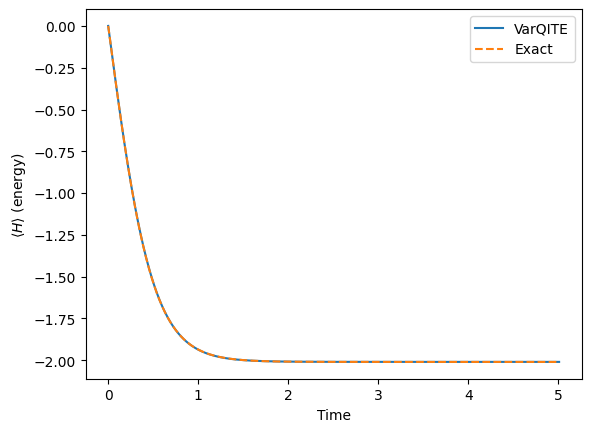

In [27]:
# plot the convergence of energy with time
import pylab

h_exp_val = np.array([ele[0][0] for ele in evolution_result.observables])

exact_h_exp_val = sol.observables[0][0].real

times = evolution_result.times
pylab.plot(times, h_exp_val, label="VarQITE")
pylab.plot(times, exact_h_exp_val, label="Exact", linestyle="--")
pylab.xlabel("Time")
pylab.ylabel(r"$\langle H \rangle$ (energy)")
pylab.legend(loc="upper right");